## Solutions Q11 - 17

In [1]:
# import all python add-ons etc that will be needed later on
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
init_printing()                      # allows printing of SymPy results in typeset maths format
plt.rcParams.update({'font.size': 16})  # set font size for plots

### Q13 answer
The following code could be used.

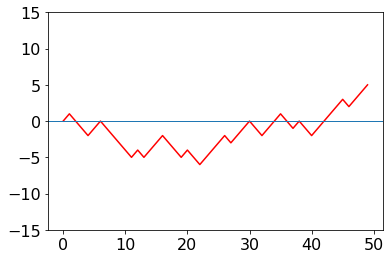

In [2]:
# Algorithm  
n = 50
d = np.zeros(n,dtype=int)
m = 0 
for j in range(n):
    d[j]= m
    r = np.random.ranf() 
    if r < 0.5 :
        m = m + 1 
    else:
        m = m - 1 
    pass                  # end for j 

plt.plot(d,color='red')
plt.ylim([-15,15])
plt.axhline(0,linewidth=1)
plt.show()

### Q14 answer
The code to do this calculation is very similar to that given in the text but the calculation is easier because no histogram is needed.

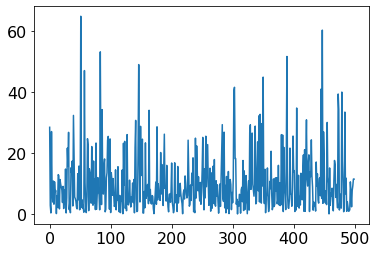

In [3]:
# Algorithm
events = 500
k1 = 1.0/10                            # reaction rate const 1/tau 
times= np.zeros(events,dtype=float)    # make array to store results  

for i in range(events):                # repeat events times       
    t= -np.log( np.random.ranf()) / k1
    times[i] = t                       # store times        
    pass

plt.plot(times)
plt.show()

The plot of event number i vs times should look similar to Fig. 11 (left), but will be different in detail because of the random nature of the events. Notice how much the time that the molecule remains in the excited state varies; these times are Poisson distributed and when a histogram is made an exponential decay with a $10$ ns decay lifetime results. 

As an exercise, make these into a histogram to convince you of this and a plot similar to Figure 11 (right) should result.

### Q15 answer
(a) The first step is to work out a numbering scheme for the position of the bases and then to select from a uniformly distributed random number, four possibilities to represent them. One such scheme is
shown in the question. Because only G bases are important, only one check needs to be made. For example, if a
random number ranges from $0 \to 4$, if it is greater than $3$, then this can be the G base. Eleven bases are then chosen at random, and placed in a list; the list is given the value $1$ if the base is G, otherwise it contains zero. The sixth base, which is in the middle, is made into the dye. The position of a G in the list is converted into the distance from the dye, (in position 6), and the rate constant calculated using the equation for $k$. The absolute value of the distance from position 6 is calculated because the transfer distance must always be positive. The whole process is repeated, until you are satisfied that the average value of $k$ is sufficiently accurate, say to 1 decimal place. The time is calculated using equation 13.

In [4]:
# Algorithm: DNA bases

def DNAbases():
    beta= 7.0
    d   = 0.34                                  # base separation
    kf  = 10**(-3)/380.0
    k0  = 3.0
    nb  = 12+1                                  # number of bases + dye
    dye =( nb-1 )//2 + 1                        # put dye in middle
    reps= 50000
    maxt= 1000.0
    bins= 1000
    DNA   = np.zeros(nb,dtype=int )
    Acount= np.zeros(bins,dtype=int)            # initial arrays zero
    dtime = np.zeros(bins,dtype=float)
    
    for i in range( bins ):                     # set time
        dtime[i]= i*maxt/bins 
        pass
    for j in range(reps):
        for i in range(nb):                     # G into DNA if rand > 3 
            if 4*np.random.ranf() > 3:
                DNA[i] = 1 
            else:
                DNA[i] = 0                      # base G has value 1
            pass
        
        a0 = kf 
        for i in range(nb) :                    # look for G, dye = 6 for 10 bases
            if DNA[i] == 1 and i != dye :
                a0 = a0 + k0*np.exp(-beta*abs(i-dye)*d)  # total rate
                pass 
            pass
        t = -np.log( np.random.ranf() )/ a0     # equation 13
        indx = int(np.round(t*bins/maxt) )      # make into index
                   
        if indx < bins -1:
            Acount[indx+1]= Acount[indx+1] + 1  # make histogram
            pass 
        pass                                    # end reps 
    return dtime,Acount
    
#times,counts = DNAbases()                         # remove # to calculate 
#print('finished')                         
#Acount[0] = Acount[1]
#plt.plot(times,counts,color='red',linewidth=1)
#plt.yscale('log')
#plt.show()

![Drawing](monte-carlo-fig35.png)

Figure 35. Semi-log plot of the decay of the donor excited state calculated with equal amounts of each base. The highly non-exponential nature of the decay is clear. The calculation is of $500000$ repeated calculations. The $1/e $ time of the decay is $\approx 2$ ps.
____

The calculation shows that the decay is initially very fast; only $\approx 2$ ps and then slows dramatically as the more distant G bases quench. The very rapid decrease of the quenching rate constant with distance and the spatial dependence of the quenchers, as with donor - acceptor energy or electron transfer in solution, causes the non - exponential decay.

### Q16 answer
We define the array P to hold the information about each student. To generate a random number from $0 \to 1$, $\mathtt{np.random.ranf()}$  but to generate a random integer in the range $0 \to n-1$ it is convenient to use $\mathtt{np.random.randint(0,n)}$.  The algorithm is shown next 

In [5]:
#Algorithm 18   Q12: SIR simulation
# P[]= 0 = Immune, 1 = susceptible,  2= Infected.

def SIR_mc():
    nums  = 1000                    # number of people
    fract = 0.01                    # initially immune
    recovr= 0.2                     # chance recovery / day
    num_infect=1                    # number infected / day
    numd = 50                       # number of  days
    reps = 40
    
    data = np.zeros(numd,dtype=int) # array for infected
    sdata= np.zeros(numd,dtype=int) # array for susceptibles
    P = np.zeros(nums,dtype=float)  # student array to zero
    
    remov = 0                       # number removed 
    for k in range( reps):          # loop for repeat calc’n     
        #set up P array with values 0,1 and 2
        
        for i in range(nums):
            P[i] = 1                        # initially all susceptible
        fn= int(np.round(fract*nums) )      # make into integer
        n = 0
        while n < fn:                       # exact fract*nums immune
            ra = np.random.randint(0,nums)  # choose rand num= 0 to nums-1
            if P[ra] != 0:
                P[ra] = 0
                n = n + 1
                pass
            pass
        n = 0
        while n < 1:                        #1 infected not one of immune
            ra = np.random.randint(0,nums)
            if P[ra] == 1:
                P[ra] = 2 
                n = 1
                pass
            pass
    
        # The main part of the calculation follows 
        for j in range(numd):                         # loop over days 
            for i in range(nums):                     # loop students 
                if P[i] == 2:                         # spread infection
                    for ii in range(num_infect):
                        ra = np.random.randint(0,nums)# infect new stdnt
                        if P[ra]== 1:
                            P[ra] = 2 
                            remov = remov + 1
                            pass
                        pass                          # end for ii
                    pass                              # end if
                if np.random.ranf() < recovr:         # chance of recovery
                    ra = np.random.randint(1,nums)
                    if P[ra] == 2:  P[ra]= 0
                    pass
                pass                                  # end for i
            c = 0 
            s = 0
            for i in range(nums):                     # find num infected 
                if P[i]== 2: c = c + 1
                if P[i]== 1: s = s + 1
                pass
            data[j]= data[j] + c                      # number infected 
            sdata[j]= sdata[j]+ s                     # number suscept
            pass                                      # end for j 
        pass                                          # end for reps 
    
    num_infected = int(remov/reps)                    # number infected
    print('finished, num infected',num_infected)
    
    return data,sdata

data, sdata = SIR_mc()

#plt.plot(sdata,color='red')
#plt.plot(data,color='blue')
#plt.show()

finished, num infected 908


The results of a sample calculation are shown in Figure 27 where the infection rises rapidly and then ends as more people become immune. If no one became immune after having the illness, every one would be infected except those initially immune and the infected curve would rise to a constant value. Reducing the chance of recovery makes the illness persist with a long tail; increasing the chance of recovery, makes the curve more symmetrical. The number of people who are susceptible falls because, after becoming ill, they are now immune so enter the removed class. The number in the removed class is not shown, as it is the total number present less those susceptible and infected. The limited nature of the disease's propagation is due to the reduction in the number of susceptible persons, not the number infected. In the outbreak almost everyone eventually becomes infected; typically $980$ out of $1000$.

Exercise: Repeat the calculation with different fractions of initially immune persons. What do you conclude about immunising populations against disease? Estimate what fraction of people needs to be immunised to prevent widespread disease.

![Drawing](monte-carlo-fig36.png)

Figure 36. Result of Monte-Carlo simulation of S-I-R disease spread. There were $1000$ persons, only one of whom was initially infected and $1$% were immune to the disease. Almost everyone else catches the disease, $810$ entering the removed class out of $1000$ individuals.